## Problem 1: Galaxy Spectra (6 points)

The attached file `Problem_Set_6_Spectra.csv` contains the spectra of $4000$ galaxies in the Sloan Digital Sky Survey (SDSS). The spectra cover a logarithmically-spaced wavelength range of $316 \mathrm{nm}$ to $794 \mathrm{nm}$. You can ignore units on the fluxes since all spectra have been normalized, i.e., $\frac{1}{n} \sum_{i=1}^n f_i^2 = 1$ for all galaxies.

(a) Make a plot of $10$ random spectra from the sample. Also show the mean spectra of all $4000$ galaxies on the same plot.

(b) Perform a Principal Component Analysis (PCA) and produce a scree plot of the explained variance.

(c) Select a spectrum of your choice, show the original spectrum as well as the reconstruction with the first $n$ eigenvalues where $n$ goes from $1$ to $5$.

(d) Show the cumulative explained variance. How many PCA components are needed to explain $95\%$ of the explained variance?

(e) How many non-zero eigenvalues does the PCA produce? Compare this number to the number of components needed to explain 95% of the variance, your answer to part (d). What does this comparison suggest about the diversity and structure of galaxy spectra? Are most spectra fundamentally different from each other, or do they share common features?

## Questions:

explained variance or ratio of explained variance?

data goes vertically???

spectrum is horizontal??

how to pick a spectra and get more than one eigenvalue??

## Problem A

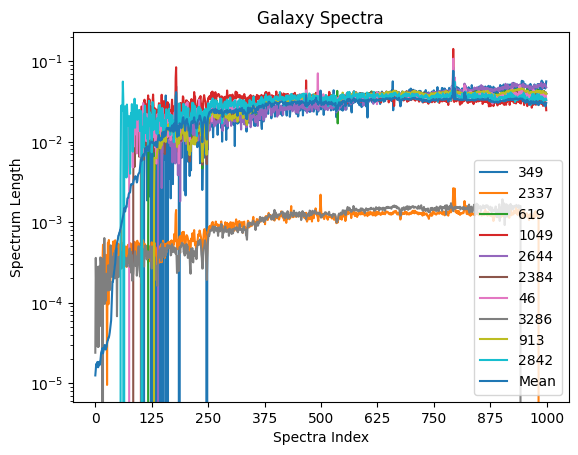

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import ticker

df = pd.read_csv("Problem_Set_6_Spectra.csv", delimiter=" ")
random_indices = random.sample(range(df.shape[0]), 10)

fig, ax = plt.subplots()
for index in random_indices:
    plt.plot(df.iloc[index], label=index)

mean_spectra = np.mean(df, axis=0)
plt.plot(mean_spectra, label="Mean")

plt.yscale("log")
x = np.linspace(0, len(mean_spectra), 9)
ax.set_xticks(x)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

plt.title("Galaxy Spectra")
plt.ylabel("Normalized Spectrum Length")
plt.xlabel("Spectra Index")
plt.legend()
plt.show()

## Problem B

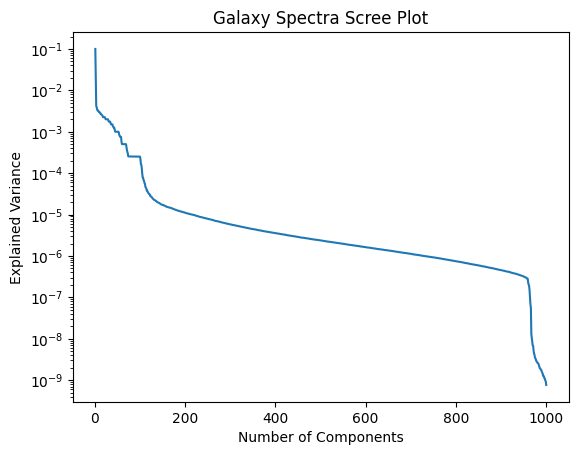

In [58]:
import pandas as pd
from sklearn.decomposition import PCA

df = pd.read_csv("Problem_Set_6_Spectra.csv", delimiter=" ")
pca = PCA().fit(df)
eigenvalues = np.arange(pca.n_components_) + 1
plt.plot(eigenvalues, pca.explained_variance_) # or explained variance ratio???
plt.title("Galaxy Spectra Scree Plot")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.yscale("log")
plt.show()


## Problem C

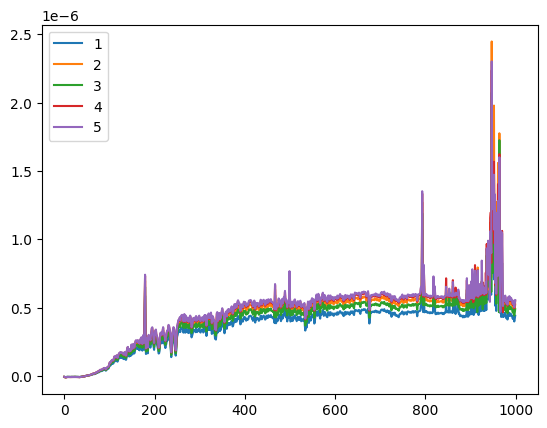

In [82]:
import pandas as pd
from sklearn.decomposition import PCA

df = pd.read_csv("Problem_Set_6_Spectra.csv", delimiter=" ")
my_spectra = df.iloc[8].to_frame()

explained_variance = []
pca = PCA().fit(df)
eigenvalues = pca.get_covariance()
for n in range(1, 6):
    plt.plot(-eigenvalues[n], label = n)

plt.legend()
plt.show()


## Problem D